In [218]:
import numpy as np
import matplotlib.pyplot as plt

def step_gradient(points, learning_rate, b_current, m_current):
    m_slope = 0
    b_slope = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        b_slope += -(2/N) * (y - m_current* x - b_current)
        m_slope += -(2/N) * (y - m_current* x - b_current)*x
    new_m = m_current - learning_rate * m_slope
    new_b = b_current - learning_rate* b_slope
    return (new_b, new_m)

def cost_gd(b, m , points):
    total_cost = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m*x + b))**2
    return total_cost/len(points)

def gd_runner(points, learning_rate = 0.001, num_iterations = 1000):
    b = 0
    m = 0
    print ("Start: ", cost_gd(b, m , points))
    for i in range(num_iterations):
        b, m = step_gradient(points, learning_rate, b, m)
    print ("FINAL: ", cost_gd(b, m , points))
    return (b, m)

def run():
    learning_rate = 0.0001
    num_iterations = 500000
    final_b, final_m = gd_runner(points, learning_rate, num_iterations)
    print(final_b, final_m)
    return (final_b, final_m)

points = np.loadtxt(open("data.csv", "rb"), delimiter=",")

In [219]:
final_b, final_m = run()

Start:  5565.107834483211
FINAL:  110.25864540573124
7.808193346466106 1.3260244442316422


In [220]:
def graph(points):
    for i in range(len(points)):
        plt.scatter(points[:, 0], points[:, 1])

def line(b, m):
    line = [m*i+b for i in range(len(points))]
    plt.plot(line, 'r')

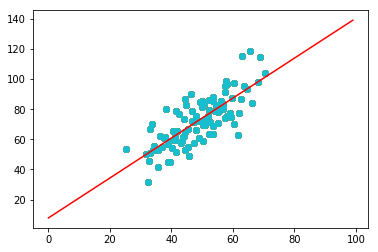

In [221]:
graph(points)
line(final_b, final_m)
plt.show()

In [222]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

clf.fit(points[:, 0].reshape(-1,1),points[:, 1].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [223]:
clf.coef_

array([[1.32243102]])

In [224]:
clf.intercept_

array([7.99102098])

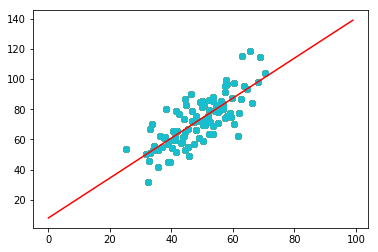

In [225]:
graph(points)
line(clf.intercept_[0], clf.coef_[0][0])
plt.show()